<a href="https://colab.research.google.com/github/davidedm07/machine_learning/blob/main/Autoencoder_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

In [4]:
x_train = x_train / 255
x_test = x_test / 255

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [6]:
encoder = Sequential()

encoder.add(Flatten(input_shape = (28,28)))
encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

In [9]:
decoder = Sequential()

decoder.add(Dense(50, activation='relu', input_shape=[25]))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [10]:
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss = 'binary_crossentropy', 
                    optimizer= SGD(learning_rate=1.5), 
                    metrics=['accuracy'])

In [12]:
autoencoder.fit(x_train, x_train, epochs=5, validation_data=(x_test,x_test))

Epoch 1/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2074 - accuracy: 0.1320 - val_loss: 0.1751 - val_accuracy: 0.1689
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1629 - accuracy: 0.1884 - val_loss: 0.1505 - val_accuracy: 0.2031
Epoch 3/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1481 - accuracy: 0.2097 - val_loss: 0.1458 - val_accuracy: 0.2040
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1408 - accuracy: 0.2211 - val_loss: 0.1368 - val_accuracy: 0.2122
Epoch 5/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1338 - accuracy: 0.2291 - val_loss: 0.1273 - val_accuracy: 0.2346


In [13]:
passed_images = autoencoder.predict(x_test[:10])

Original Image


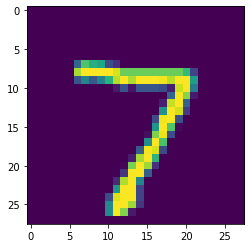

Image after autoncoder


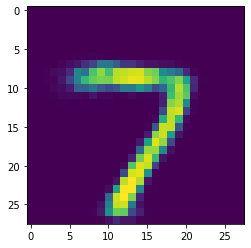

In [16]:
n = 0
print('Original Image')
plt.imshow(x_test[n])
plt.show()
print('Image after autoncoder')
plt.imshow(passed_images[n])

In [17]:
from tensorflow.keras.layers import GaussianNoise

In [19]:
gn = GaussianNoise(0.2)
noisy = gn(x_test[:10], training=True)

Original Image


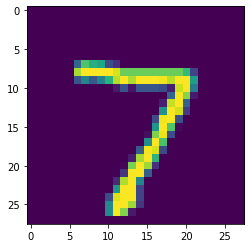

Image after gaussian noise


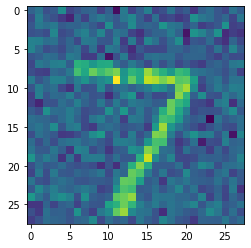

In [20]:
n = 0
print('Original Image')
plt.imshow(x_test[n])
plt.show()
print('Image after gaussian noise')
plt.imshow(noisy[n])

### Let's create noise removal autoencoder

In [21]:
encoder = Sequential()

encoder.add(Flatten(input_shape = (28,28)))

encoder.add(GaussianNoise(0.2))

encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

In [22]:
decoder = Sequential()

decoder.add(Dense(50, activation='relu', input_shape=[25]))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [23]:
noise_remover = Sequential([encoder,decoder])

In [24]:
noise_remover.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=1.5))

In [25]:
noise_remover.fit(x_train,x_train, epochs = 8, validation_data=(x_test,x_test))

Epoch 1/8
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2955 - val_loss: 0.2163
Epoch 2/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2044 - val_loss: 0.1723
Epoch 3/8
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1690 - val_loss: 0.1612
Epoch 4/8
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1528 - val_loss: 0.1475
Epoch 5/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1460 - val_loss: 0.1423
Epoch 6/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1423 - val_loss: 0.1360
Epoch 7/8
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1386 - val_loss: 0.1304
Epoch 8/8
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1341 - val_loss: 0.1294


Original Image


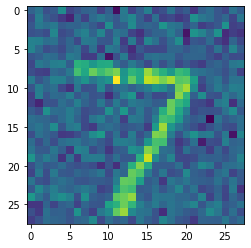

Image after gaussian noise


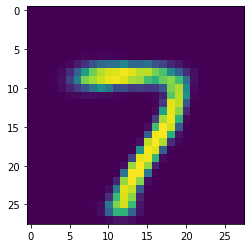

In [26]:
denoised_images = noise_remover.predict(x_test[:10])
n = 0
print('Original Image')
plt.imshow(noisy[n])
plt.show()
print('Image after gaussian noise')
plt.imshow(denoised_images[n])